# Calling Preprocessing

In [1]:
from Data_Processing import DataPreProcess
dp=DataPreProcess()

The null in dataset are:
 NDVI01    0
NDVI02    0
NDVI03    0
NDVI04    0
NDVI05    0
NDVI06    0
NDVI07    0
NDVI08    0
NDVI09    0
NDVI10    0
NDVI11    0
NDVI12    0
label     0
year      0
dtype: int64
As there is no Null in Dataset so no removal us needed

Now we will check for the correlation in dataset



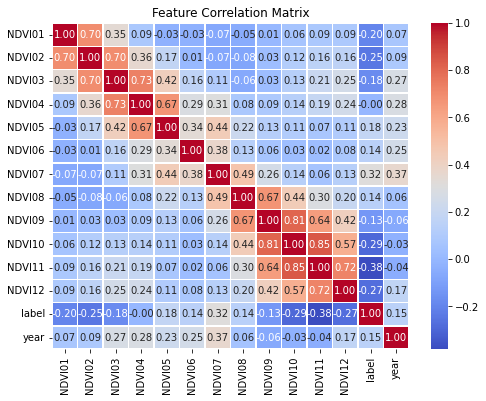

As the data is a time series data so we will not remove the correlated columns because it can lead to data loss
     NDVI01    NDVI02    NDVI03    NDVI04    NDVI05    NDVI06    NDVI07  \
0  0.153184  0.222615  0.498528  0.611280  0.285032  0.112775  0.529626   
1  0.137897  0.106036  0.169626  0.330396  0.594655  0.227967  0.578199   
2  0.122481  0.088123  0.182121  0.376037  0.431042  0.350422  0.630027   
3  0.085279  0.091887  0.140729  0.243528  0.224835  0.046875  0.579180   
4  0.091678  0.094313  0.247900  0.367800  0.546883  0.476697  0.699308   

     NDVI08    NDVI09    NDVI10    NDVI11    NDVI12  label  year  
0  0.546617  0.604374  0.571359  0.620985  0.496628      1  2021  
1  0.661604  0.783454  0.777313  0.729177  0.636792      1  2021  
2  0.724557  0.844643  0.673307  0.736385  0.635118      1  2021  
3  0.666857  0.611009  0.625423  0.612167  0.208681      1  2021  
4  0.768818  0.753445  0.711491  0.707040  0.647931      1  2021  
Splitting the data:

Training Datas

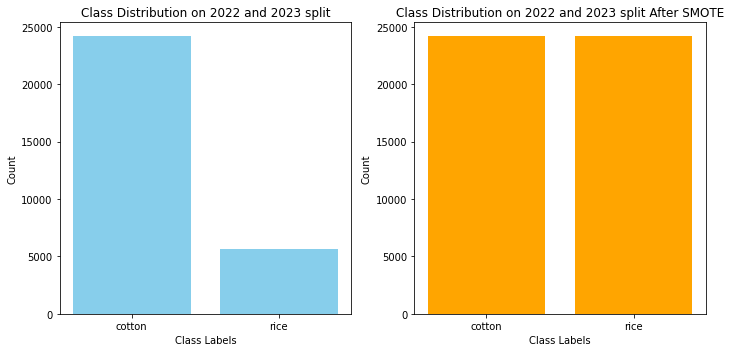

Original class distribution: Counter({1: 24188, 0: 5606})
New class distribution after SMOTE: Counter({1: 24188, 0: 24188})
Total samples after augmentation: 48376


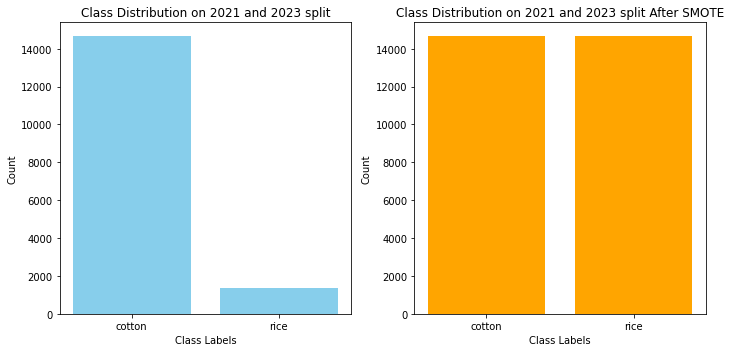

Original class distribution: Counter({1: 14660, 0: 1338})
New class distribution after SMOTE: Counter({1: 14660, 0: 14660})
Total samples after augmentation: 29320


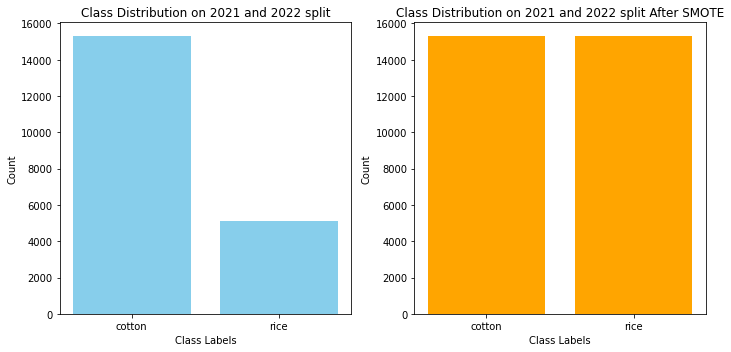

Original class distribution: Counter({1: 15294, 0: 5106})
New class distribution after SMOTE: Counter({1: 15294, 0: 15294})
Total samples after augmentation: 30588


In [2]:
data=dp.apply_preprocessing()

# Models

## Random Forrest

#### Getting best hyper prameters using mean of weighted f1 score on all three year

In [3]:
from supervisedModels.RandomForrest import RandomForrest
param_grid = {
    "n_estimators": [50, 100, 200],  
    "max_depth": [10, 20, 30],    
    "min_samples_leaf": [5, 10],   
}

RF = RandomForrest(data=data, param_grid=param_grid)
RF.get_best_hyperparameters()



Hyperparameter tuning when testing set is 2021 data


100%|██████████| 18/18 [00:52<00:00,  2.91s/it]




Hyperparameter tuning when testing set is 2022 data


100%|██████████| 18/18 [00:30<00:00,  1.71s/it]




Hyperparameter tuning when testing set is 2023 data


100%|██████████| 18/18 [00:33<00:00,  1.84s/it]



Parameters with Highest Mean Weighted F1 Score:
Params: {'max_depth': 30, 'min_samples_leaf': 10, 'n_estimators': 50}
Highest mean weighted F1 Score: 0.8875168151514584



#### Getting test results on all three years

Final Results for year: 2021:
Parameters: {'max_depth': 30, 'min_samples_leaf': 10, 'n_estimators': 50}
Weighted F1: 0.8820
Accuracy: 0.8798
Precision: 0.9371
Recall: 0.9244
F1 Score: 0.9307
Confusion Matrix: [[ 240  179]
 [ 218 2665]]
Classification Report:               precision    recall  f1-score   support

        rice       0.52      0.57      0.55       419
      cotton       0.94      0.92      0.93      2883

    accuracy                           0.88      3302
   macro avg       0.73      0.75      0.74      3302
weighted avg       0.88      0.88      0.88      3302


Final Results for year: 2022:
Parameters: {'max_depth': 30, 'min_samples_leaf': 10, 'n_estimators': 50}
Weighted F1: 0.8852
Accuracy: 0.8899
Precision: 0.8911
Recall: 0.9663
F1 Score: 0.9272
Confusion Matrix: [[ 3222  1465]
 [  418 11993]]
Classification Report:               precision    recall  f1-score   support

        rice       0.89      0.69      0.77      4687
      cotton       0.89      0.97      0.

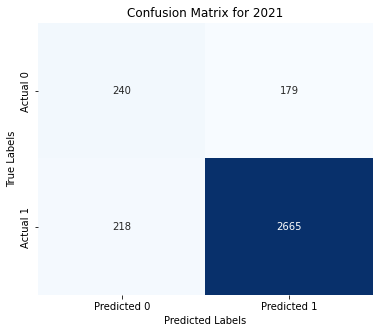

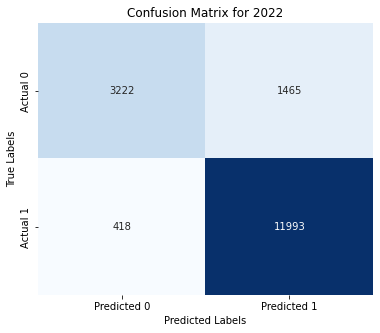

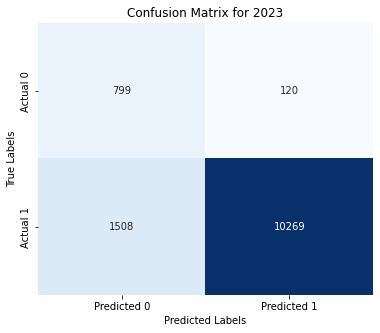

In [4]:
RF.get_test_results()

## Bagging (Bootstrap Aggregation) 

#### Getting best hyper prameters using mean of weighted f1 score on all three year

In [5]:
from supervisedModels.Bagging import Bagging
param_grid = {
    "n_estimators": [50, 100, 200],  
    "base_estimator__max_depth": [10, 20],   
}

bagging = Bagging(data=data, param_grid=param_grid)
bagging.get_best_hyperparameters()



Hyperparameter tuning when testing set is 2021 data


100%|██████████| 6/6 [01:14<00:00, 12.34s/it]




Hyperparameter tuning when testing set is 2022 data


100%|██████████| 6/6 [00:34<00:00,  5.79s/it]




Hyperparameter tuning when testing set is 2023 data


100%|██████████| 6/6 [00:41<00:00,  6.99s/it]



Parameters with Highest Mean Weighted F1 Score:
Params: {'base_estimator__max_depth': 20, 'n_estimators': 200}
Highest mean weighted F1 Score: 0.8722231892567608



#### Getting test results on all three years

Final Results for year: 2021:
Parameters: {'base_estimator__max_depth': 20, 'n_estimators': 200}
Weighted F1: 0.8738
Accuracy: 0.8686
Precision: 0.9381
Recall: 0.9095
F1 Score: 0.9236
Confusion Matrix: [[ 246  173]
 [ 261 2622]]
Classification Report:               precision    recall  f1-score   support

        rice       0.49      0.59      0.53       419
      cotton       0.94      0.91      0.92      2883

    accuracy                           0.87      3302
   macro avg       0.71      0.75      0.73      3302
weighted avg       0.88      0.87      0.87      3302


Final Results for year: 2022:
Parameters: {'base_estimator__max_depth': 20, 'n_estimators': 200}
Weighted F1: 0.8481
Accuracy: 0.8558
Precision: 0.8639
Recall: 0.9512
F1 Score: 0.9054
Confusion Matrix: [[ 2827  1860]
 [  606 11805]]
Classification Report:               precision    recall  f1-score   support

        rice       0.82      0.60      0.70      4687
      cotton       0.86      0.95      0.91     12411



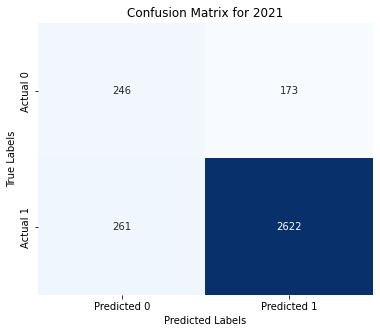

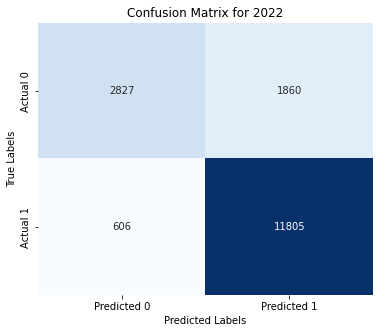

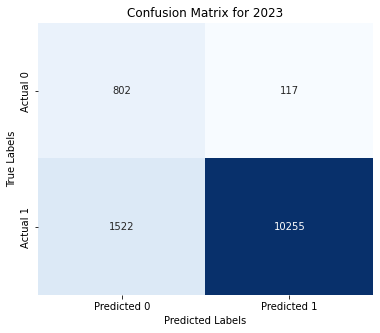

In [6]:
bagging.get_test_results()

## SVM

#### Getting best hyper prameters using mean of weighted f1 score on all three year

In [7]:
from supervisedModels.SVM import SVM
param_grid = {
    'C': [1, 10],
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto'],
}

svm = SVM(data=data, param_grid=param_grid)
svm.get_best_hyperparameters()



Hyperparameter tuning when testing set is 2021 data


100%|██████████| 8/8 [06:00<00:00, 45.01s/it]




Hyperparameter tuning when testing set is 2022 data


100%|██████████| 8/8 [01:40<00:00, 12.62s/it]




Hyperparameter tuning when testing set is 2023 data


100%|██████████| 8/8 [02:08<00:00, 16.11s/it]



Parameters with Highest Mean Weighted F1 Score:
Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Highest mean weighted F1 Score: 0.8707036207545699



#### Getting test results on all three years

Final Results for year: 2021:
Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Weighted F1: 0.8970
Accuracy: 0.8958
Precision: 0.9437
Recall: 0.9365
F1 Score: 0.9401
Confusion Matrix: [[ 258  161]
 [ 183 2700]]
Classification Report:               precision    recall  f1-score   support

        rice       0.59      0.62      0.60       419
      cotton       0.94      0.94      0.94      2883

    accuracy                           0.90      3302
   macro avg       0.76      0.78      0.77      3302
weighted avg       0.90      0.90      0.90      3302


Final Results for year: 2022:
Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Weighted F1: 0.8390
Accuracy: 0.8459
Precision: 0.8620
Recall: 0.9379
F1 Score: 0.8984
Confusion Matrix: [[ 2824  1863]
 [  771 11640]]
Classification Report:               precision    recall  f1-score   support

        rice       0.79      0.60      0.68      4687
      cotton       0.86      0.94      0.90     12411

    accuracy        

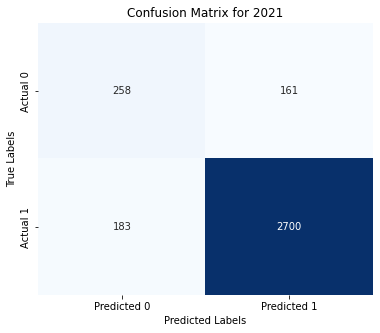

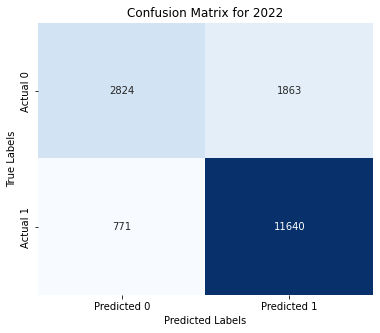

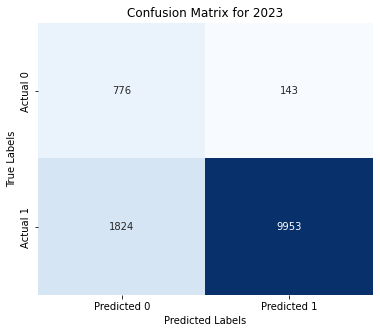

In [8]:
svm.get_test_results()

## XGBoost

#### Getting best hyper prameters using mean of weighted f1 score on all three year

In [9]:
from supervisedModels.XGBoost import XGBoost
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.05, 0.2],
    'max_depth': [5, 10, 20],
}
xg = XGBoost(data=data, param_grid=param_grid)
xg.get_best_hyperparameters()



Hyperparameter tuning when testing set is 2021 data


100%|██████████| 18/18 [04:48<00:00, 16.01s/it]




Hyperparameter tuning when testing set is 2022 data


100%|██████████| 18/18 [02:21<00:00,  7.84s/it]




Hyperparameter tuning when testing set is 2023 data


100%|██████████| 18/18 [02:45<00:00,  9.19s/it]



Parameters with Highest Mean Weighted F1 Score:
Params: {'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100}
Highest mean weighted F1 Score: 0.888403396906936



#### Getting test results on all three years

Final Results for year: 2021:
Parameters: {'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100}
Weighted F1: 0.9097
Accuracy: 0.9116
Precision: 0.9432
Recall: 0.9563
F1 Score: 0.9497
Confusion Matrix: [[ 253  166]
 [ 126 2757]]
Classification Report:               precision    recall  f1-score   support

        rice       0.67      0.60      0.63       419
      cotton       0.94      0.96      0.95      2883

    accuracy                           0.91      3302
   macro avg       0.81      0.78      0.79      3302
weighted avg       0.91      0.91      0.91      3302


Final Results for year: 2022:
Parameters: {'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100}
Weighted F1: 0.8613
Accuracy: 0.8696
Precision: 0.8674
Recall: 0.9683
F1 Score: 0.9151
Confusion Matrix: [[ 2850  1837]
 [  393 12018]]
Classification Report:               precision    recall  f1-score   support

        rice       0.88      0.61      0.72      4687
      cotton       0.87      0.97      0.92

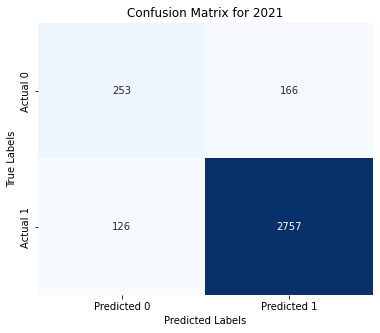

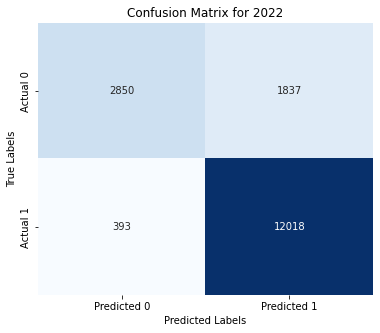

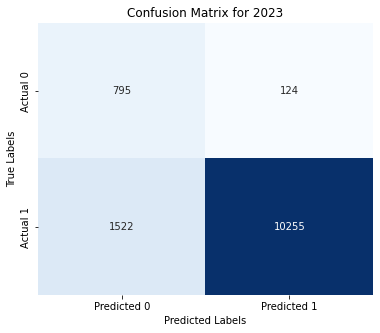

In [10]:
xg.get_test_results()